In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
bank=pd.read_csv("C:/Users/Sushi/bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
bank.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
bank.shape

(45211, 17)

In [12]:
#detecting outliers

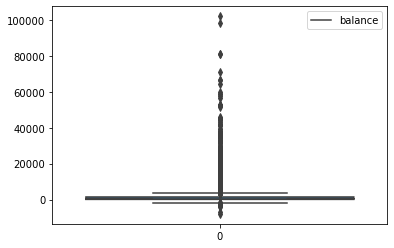

In [13]:
sns.boxplot(data=[bank['balance']],notch=True)
plt.legend(['balance'])

In [14]:
Q1 = bank.balance.quantile(0.25)
Q3 = bank.balance.quantile(0.75)
Q1,Q3

(72.0, 1428.0)

In [15]:
IQR = Q3-Q1
IQR

1356.0

In [16]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1962.0, 3462.0)

In [17]:
#there are outliers

In [18]:
bank[(bank.balance<lower_limit)|(bank.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [19]:
bank_no_outlier = bank[(bank.balance>lower_limit)&(bank.balance<upper_limit)]
bank_no_outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


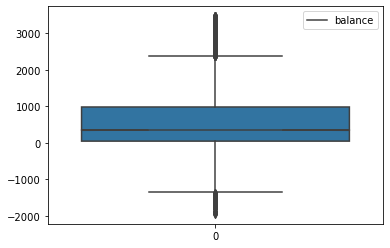

In [20]:
sns.boxplot(data=[bank_no_outlier['balance']],notch=True)
plt.legend(['balance'])

In [21]:
#suspected there are more outliers to trying to remove

In [22]:
Q1=bank_no_outlier.balance.quantile(0.25)
Q3=bank_no_outlier.balance.quantile(0.75)
Q1,Q3

(46.0, 980.0)

In [23]:
IQR=Q3-Q1
IQR

934.0

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1355.0, 2381.0)

In [25]:
bank_no_outlier[(bank_no_outlier.balance<lower_limit)|(bank_no_outlier.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40,44,services,divorced,secondary,no,2586,yes,no,unknown,5,may,160,1,-1,0,unknown,no
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
244,49,management,married,tertiary,no,3237,yes,no,unknown,5,may,232,3,-1,0,unknown,no
257,30,technician,single,secondary,no,2573,yes,no,unknown,5,may,67,2,-1,0,unknown,no
323,32,technician,divorced,tertiary,no,2558,no,no,unknown,5,may,148,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45169,31,management,married,tertiary,no,2994,yes,no,cellular,10,nov,182,1,229,2,failure,no
45175,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
45180,66,retired,married,secondary,no,3409,no,no,cellular,15,nov,414,2,27,6,failure,no
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


In [26]:
bank_no_outlier_new = bank_no_outlier[(bank_no_outlier.balance>lower_limit)&(bank_no_outlier.balance<upper_limit)]
bank_no_outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


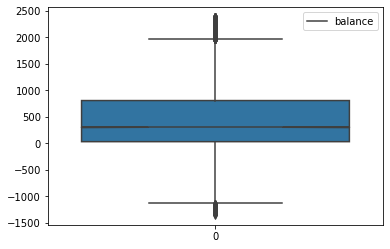

In [27]:
sns.boxplot(data=[bank_no_outlier_new['balance']],notch=True)
plt.legend(['balance'])

In [28]:
# suspected there are outliers boxplot

In [29]:
Q1 =bank_no_outlier_new.balance.quantile(0.25)
Q3 = bank_no_outlier_new.balance.quantile(0.75)
Q1,Q3

(32.0, 808.0)

In [30]:
IQR=Q3-Q1
print(IQR)

776.0


In [31]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1132.0, 1972.0)

In [32]:
bank_no_outlier_new[(bank_no_outlier_new.balance<lower_limit)|(bank_no_outlier_new.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
190,51,retired,married,secondary,no,2127,yes,no,unknown,5,may,172,1,-1,0,unknown,no
249,51,services,married,secondary,no,2248,yes,no,unknown,5,may,714,2,-1,0,unknown,no
427,54,blue-collar,married,primary,no,2102,yes,no,unknown,6,may,76,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45153,64,retired,married,tertiary,no,2059,no,yes,cellular,9,nov,326,1,95,1,other,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,failure,no


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
bank_no_outlier_new1 = bank_no_outlier_new[(bank_no_outlier_new.balance>lower_limit)&(bank_no_outlier_new.balance<upper_limit)]
bank_no_outlier_new1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


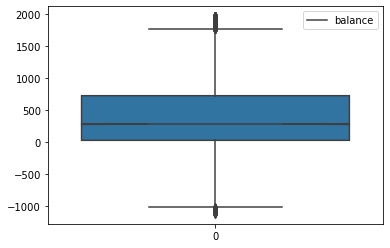

In [35]:
sns.boxplot(data=[bank_no_outlier_new1['balance']],notch=True)
plt.legend(['balance'])

In [36]:
# i suspect there outliers

In [37]:
Q1 = bank_no_outlier_new1.balance.quantile(0.25)
Q3 = bank_no_outlier_new1.balance.quantile(0.75)
Q1,Q3

(25.0, 725.0)

In [38]:
IQR=Q3-Q1
print(IQR)

700.0


In [39]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


(-1025.0, 1775.0)

In [40]:
bank_no_outlier_new1[(bank_no_outlier_new1.balance<lower_limit)|(bank_no_outlier_new1.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
74,43,technician,married,secondary,no,1937,yes,no,unknown,5,may,181,1,-1,0,unknown,no
156,51,blue-collar,married,unknown,no,1883,yes,no,unknown,5,may,57,1,-1,0,unknown,no
233,53,blue-collar,married,unknown,no,1827,no,no,unknown,5,may,121,1,-1,0,unknown,no
407,46,blue-collar,divorced,primary,no,1927,yes,no,unknown,6,may,241,3,-1,0,unknown,no
479,39,management,single,secondary,no,1877,yes,no,unknown,6,may,185,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45036,28,management,married,tertiary,no,1918,no,no,cellular,18,oct,333,1,616,1,failure,no
45052,49,blue-collar,married,secondary,no,1946,no,no,cellular,19,oct,192,1,95,1,success,yes
45066,29,student,single,secondary,no,1925,no,no,cellular,21,oct,150,3,149,5,success,yes
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,success,yes


In [41]:
bank_1 = bank_no_outlier_new1[(bank_no_outlier.balance>lower_limit)&(bank_no_outlier.balance<upper_limit)]
bank_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


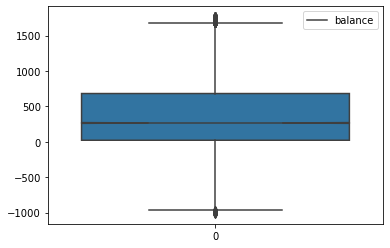

In [42]:
sns.boxplot(data=[bank_1['balance']],notch=True)
plt.legend(['balance'])

In [43]:
# there are some outliers

In [44]:
Q1 = bank_1.balance.quantile(0.25)
Q3 = bank_1.balance.quantile(0.75)
Q1,Q3

(22.0, 682.0)

In [45]:
IQR=Q3-Q1
print(IQR)

660.0


In [46]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-968.0, 1672.0)

In [47]:
bank_1[(bank_1.balance<lower_limit)|(bank_1.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
132,38,technician,single,secondary,no,1685,yes,no,unknown,5,may,185,1,-1,0,unknown,no
160,48,services,married,unknown,no,1705,yes,no,unknown,5,may,107,1,-1,0,unknown,no
431,42,management,married,tertiary,no,1680,yes,no,unknown,6,may,765,1,-1,0,unknown,no
514,50,management,divorced,secondary,no,1716,yes,no,unknown,6,may,82,1,-1,0,unknown,no
566,38,management,married,unknown,no,1759,yes,no,unknown,6,may,440,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44932,71,retired,married,secondary,no,1696,no,no,cellular,6,oct,486,1,-1,0,unknown,yes
45053,25,admin.,single,tertiary,no,1734,no,no,cellular,19,oct,366,1,-1,0,unknown,no
45094,47,admin.,single,secondary,no,1693,yes,no,cellular,22,oct,608,2,92,4,other,yes
45121,56,admin.,divorced,secondary,no,1693,no,no,cellular,26,oct,238,4,442,4,failure,yes


In [48]:
bank_2 = bank_1[(bank_1.balance>lower_limit)&(bank_1.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


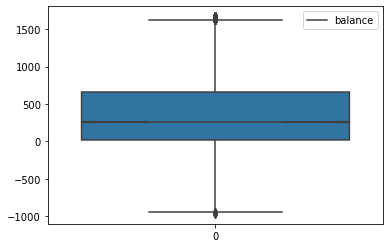

In [49]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [50]:
#still there are outliers

In [51]:
Q1 = bank_2.balance.quantile(0.25)
Q3 = bank_2.balance.quantile(0.75)
Q1,Q3

(20.0, 660.0)

In [52]:
IQR=Q3-Q1
print(IQR)

640.0


In [53]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-940.0, 1620.0)

In [54]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
385,58,services,married,secondary,no,1667,yes,yes,unknown,6,may,85,1,-1,0,unknown,no
409,46,blue-collar,married,secondary,no,1660,yes,no,unknown,6,may,259,1,-1,0,unknown,no
465,57,retired,single,secondary,no,1640,no,yes,unknown,6,may,204,4,-1,0,unknown,no
695,44,entrepreneur,married,tertiary,no,1631,yes,no,unknown,6,may,346,2,-1,0,unknown,no
1169,34,blue-collar,single,secondary,yes,-947,yes,no,unknown,8,may,211,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44700,34,admin.,married,tertiary,no,1636,yes,yes,cellular,6,sep,136,1,521,2,failure,no
44705,38,entrepreneur,married,tertiary,no,1649,no,yes,cellular,6,sep,218,2,432,3,success,no
44724,32,blue-collar,married,primary,no,1644,no,no,cellular,7,sep,492,3,102,5,other,yes
44922,54,blue-collar,single,secondary,no,1633,yes,no,unknown,4,oct,12,1,-1,0,unknown,no


In [55]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


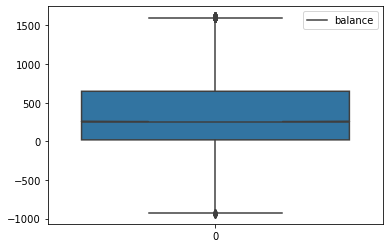

In [56]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [57]:
#suspected there more outliers

In [58]:
IQR=Q3-Q1
print(IQR)

640.0


In [59]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-940.0, 1620.0)

In [60]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [61]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


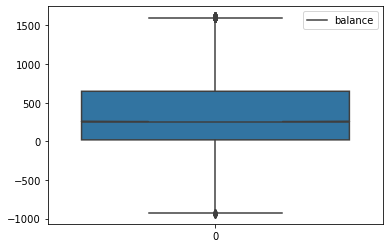

In [62]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [63]:
Q1 = bank_2.balance.quantile(0.25)
Q3 = bank_2.balance.quantile(0.75)
Q1,Q3

(19.5, 648.0)

In [64]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-940.5, 1608.0)

In [65]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
784,57,technician,married,unknown,no,1617,yes,no,unknown,7,may,96,2,-1,0,unknown,no
2596,32,admin.,divorced,secondary,no,1611,yes,yes,unknown,13,may,93,1,-1,0,unknown,no
2821,41,blue-collar,single,primary,no,1618,yes,no,unknown,14,may,1553,1,-1,0,unknown,yes
2981,33,admin.,single,secondary,no,1613,yes,no,unknown,14,may,565,1,-1,0,unknown,no
5436,31,unemployed,single,tertiary,no,1611,yes,no,unknown,23,may,154,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41875,62,management,divorced,tertiary,no,1619,no,no,cellular,19,oct,534,1,-1,0,unknown,no
43062,64,retired,married,secondary,no,1612,no,no,cellular,18,feb,362,1,183,4,failure,no
43312,51,management,married,tertiary,no,1612,no,no,cellular,16,mar,384,1,182,5,failure,no
43317,32,management,single,tertiary,no,1619,no,no,cellular,17,mar,184,1,321,2,success,no


In [66]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


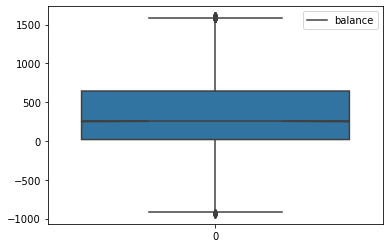

In [67]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [68]:
Q1 = bank_2.balance.quantile(0.25)
Q3 = bank_2.balance.quantile(0.75)
Q1,Q3

(19.0, 644.0)

In [69]:
IQR=Q3-Q1
print(IQR)

625.0


In [70]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-918.5, 1581.5)

In [71]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
571,56,blue-collar,married,secondary,no,1602,yes,no,unknown,6,may,427,1,-1,0,unknown,no
934,54,blue-collar,married,secondary,no,-932,yes,no,unknown,7,may,799,1,-1,0,unknown,no
1421,34,management,married,tertiary,no,1601,yes,no,unknown,8,may,650,2,-1,0,unknown,no
2897,48,blue-collar,married,secondary,no,1596,yes,no,unknown,14,may,760,1,-1,0,unknown,yes
3562,50,blue-collar,married,secondary,no,1604,yes,no,unknown,15,may,267,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44619,28,management,single,tertiary,no,1584,yes,no,cellular,1,sep,222,2,-1,0,unknown,yes
44690,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no
44759,28,admin.,married,secondary,no,1595,no,no,cellular,9,sep,268,1,254,4,success,yes


In [72]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


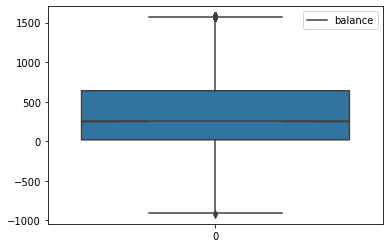

In [73]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [74]:
Q1 = bank_2.balance.quantile(0.25)
Q3 = bank_2.balance.quantile(0.75)
Q1, Q3

(19.0, 639.0)

In [75]:
IQR=Q3-Q1
print(IQR)

620.0


In [76]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-911.0, 1569.0)

In [77]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1126,46,technician,married,secondary,no,1571,yes,no,unknown,7,may,489,2,-1,0,unknown,no
2586,53,blue-collar,married,secondary,no,1570,yes,no,unknown,13,may,29,1,-1,0,unknown,no
2716,41,management,divorced,tertiary,no,1576,yes,no,unknown,13,may,232,2,-1,0,unknown,no
4660,34,admin.,single,secondary,no,1581,yes,yes,unknown,20,may,52,11,-1,0,unknown,no
5370,26,student,single,tertiary,no,1570,yes,no,unknown,23,may,81,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,31,technician,married,tertiary,no,1570,yes,no,cellular,8,mar,277,4,286,1,failure,yes
44150,29,self-employed,single,tertiary,no,1579,no,no,cellular,13,jul,178,1,181,4,success,yes
44327,64,retired,married,secondary,no,1574,no,no,telephone,29,jul,301,3,-1,0,unknown,yes
44727,31,technician,married,tertiary,no,1570,yes,no,cellular,8,sep,213,4,184,5,success,no


In [78]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


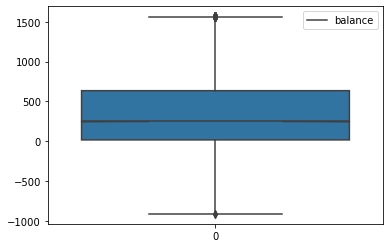

In [79]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [80]:
Q1 = bank_2.balance.quantile(0.25)
Q3 = bank_2.balance.quantile(0.75)
Q1, Q3

(18.0, 635.0)

In [81]:
IQR=Q3-Q1
print(IQR)

617.0


In [82]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-907.5, 1560.5)

In [83]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3243,41,blue-collar,divorced,primary,no,1563,yes,no,unknown,15,may,112,1,-1,0,unknown,no
5182,49,blue-collar,married,secondary,no,1568,no,no,unknown,21,may,206,6,-1,0,unknown,no
6759,57,management,married,primary,no,1566,no,no,unknown,28,may,105,4,-1,0,unknown,no
8759,29,management,single,tertiary,no,1566,yes,no,unknown,4,jun,233,1,-1,0,unknown,no
10798,39,blue-collar,married,primary,no,1564,no,no,unknown,17,jun,57,1,-1,0,unknown,no
10895,48,blue-collar,married,secondary,no,1562,no,no,unknown,17,jun,50,2,-1,0,unknown,no
10916,36,admin.,single,tertiary,no,1568,no,no,unknown,17,jun,433,2,-1,0,unknown,no
15109,52,management,married,tertiary,no,1564,yes,no,cellular,17,jul,493,1,-1,0,unknown,no
15799,29,technician,married,secondary,no,-910,yes,no,cellular,21,jul,260,1,-1,0,unknown,no
16395,50,management,married,tertiary,no,1562,yes,no,cellular,23,jul,92,2,-1,0,unknown,no


In [84]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


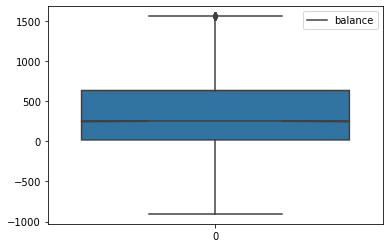

In [85]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

In [86]:
Q1 = bank_2.balance.quantile(0.25)
Q3 = bank_2.balance.quantile(0.75)
Q1, Q3

(18.0, 634.0)

In [87]:
IQR=Q3-Q1
print(IQR)

616.0


In [88]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-906.0, 1558.0)

In [89]:
bank_2[(bank_2.balance<lower_limit)|(bank_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7574,43,blue-collar,married,secondary,no,1559,yes,no,unknown,30,may,123,1,-1,0,unknown,no
10201,37,admin.,single,secondary,no,1560,yes,no,unknown,11,jun,203,2,-1,0,unknown,no
10620,38,services,married,secondary,no,1559,no,no,unknown,16,jun,162,1,-1,0,unknown,no
13694,56,management,married,secondary,no,1560,yes,no,cellular,9,jul,89,1,-1,0,unknown,no
21153,32,technician,married,tertiary,no,1559,yes,yes,cellular,14,aug,144,7,-1,0,unknown,no
23504,41,management,married,tertiary,no,1559,no,no,cellular,28,aug,74,7,-1,0,unknown,no
26862,37,technician,divorced,secondary,no,1559,yes,no,cellular,20,nov,178,2,170,8,other,no
26922,37,admin.,single,secondary,no,1560,yes,no,cellular,21,nov,67,1,163,2,failure,no
29802,48,self-employed,married,secondary,no,1559,no,no,cellular,4,feb,130,2,-1,0,unknown,no
33929,42,technician,married,unknown,no,1559,no,no,cellular,30,apr,368,1,-1,0,unknown,yes


In [90]:
bank_2 = bank_2[(bank_2.balance>lower_limit)&(bank_2.balance<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


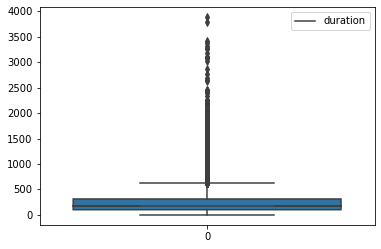

In [91]:
sns.boxplot(data=[bank_2['duration']],notch=True)
plt.legend(['duration'])

In [92]:
Q1 = bank_2.duration.quantile(0.25)
Q3 = bank_2.duration.quantile(0.75)
Q1, Q3

(102.0, 313.0)

In [93]:
IQR=Q3-Q1
print(IQR)

211.0


In [94]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-214.5, 629.5)

In [95]:
bank_2[(bank_2.duration<lower_limit)|(bank_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45085,25,technician,single,secondary,no,325,no,no,cellular,22,oct,716,3,-1,0,unknown,yes
45124,27,blue-collar,single,primary,no,232,yes,no,cellular,26,oct,701,2,-1,0,unknown,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [96]:
bank_2 = bank_2[(bank_2.duration>lower_limit)&(bank_2.duration<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


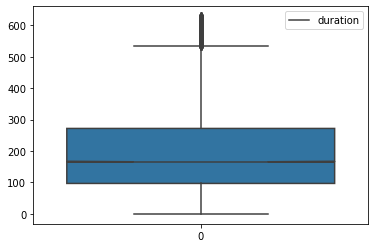

In [97]:
sns.boxplot(data=[bank_2['duration']],notch=True)
plt.legend(['duration'])

In [98]:
Q1 = bank_2.duration.quantile(0.25)
Q3 = bank_2.duration.quantile(0.75)
Q1, Q3

(97.0, 272.0)

In [99]:
IQR=Q3-Q1
print(IQR)

175.0


In [100]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-165.5, 534.5)

In [101]:
bank_2[(bank_2.duration<lower_limit)|(bank_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,no
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,no
92,60,admin.,married,secondary,no,290,yes,no,unknown,5,may,583,1,-1,0,unknown,no
139,46,blue-collar,married,secondary,no,265,yes,no,unknown,5,may,541,1,-1,0,unknown,no
149,54,blue-collar,married,primary,no,348,yes,no,unknown,5,may,579,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44904,48,management,single,tertiary,no,334,yes,no,cellular,28,sep,600,2,92,12,success,yes
45011,59,technician,married,secondary,no,1,no,no,cellular,14,oct,585,1,182,5,success,yes
45077,20,student,single,secondary,no,88,no,no,telephone,21,oct,621,1,181,4,other,no
45084,29,blue-collar,single,tertiary,no,455,no,no,cellular,22,oct,542,4,148,3,success,yes


In [102]:
bank_2 = bank_2[(bank_2.duration>lower_limit)&(bank_2.duration<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


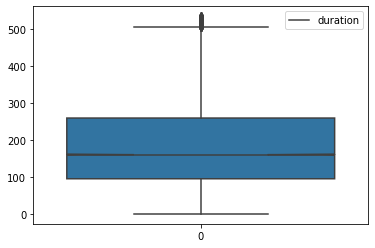

In [103]:
sns.boxplot(data=[bank_2['duration']],notch=True)
plt.legend(['duration'])

In [104]:
Q1 = bank_2.duration.quantile(0.25)
Q3 = bank_2.duration.quantile(0.75)
Q1, Q3

(95.0, 259.0)

In [105]:
IQR=Q3-Q1
print(IQR)

164.0


In [106]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-151.0, 505.0)

In [107]:
bank_2[(bank_2.duration<lower_limit)|(bank_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
66,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,unknown,no
85,51,blue-collar,married,primary,no,173,yes,no,unknown,5,may,529,2,-1,0,unknown,no
108,59,retired,single,secondary,no,30,yes,no,unknown,5,may,514,1,-1,0,unknown,no
116,41,admin.,married,secondary,no,351,yes,no,unknown,5,may,518,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45042,64,retired,married,secondary,no,466,yes,no,cellular,18,oct,526,1,-1,0,unknown,yes
45131,47,management,married,tertiary,no,0,no,no,cellular,27,oct,508,1,-1,0,unknown,yes
45144,60,admin.,divorced,secondary,no,683,no,no,cellular,8,nov,507,1,-1,0,unknown,no
45160,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96,5,success,yes


In [108]:
bank_2 = bank_2[(bank_2.duration>lower_limit)&(bank_2.duration<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


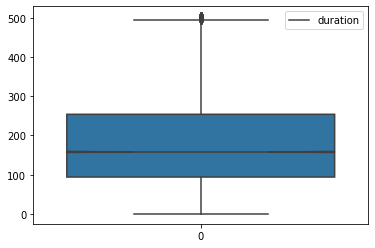

In [109]:
sns.boxplot(data=[bank_2['duration']],notch=True)
plt.legend(['duration'])

In [110]:
Q1 = bank_2.duration.quantile(0.25)
Q3 = bank_2.duration.quantile(0.75)
Q1, Q3

(94.0, 254.0)

In [111]:
IQR=Q3-Q1
print(IQR)

160.0


In [112]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-146.0, 494.0)

In [113]:
bank_2[(bank_2.duration<lower_limit)|(bank_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
345,53,services,married,unknown,no,18,no,no,unknown,5,may,503,2,-1,0,unknown,no
387,32,unemployed,married,secondary,no,10,yes,no,unknown,6,may,501,4,-1,0,unknown,no
420,49,management,single,tertiary,no,163,yes,no,unknown,6,may,496,3,-1,0,unknown,no
792,40,retired,married,primary,no,407,yes,no,unknown,7,may,502,1,-1,0,unknown,no
1332,34,blue-collar,single,secondary,no,177,yes,no,unknown,8,may,500,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43526,40,technician,married,tertiary,no,206,no,no,cellular,23,apr,499,6,185,4,success,yes
44312,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
44436,29,management,single,tertiary,no,437,no,no,cellular,5,aug,504,1,92,1,success,yes
44494,40,blue-collar,married,secondary,no,1515,yes,no,cellular,10,aug,503,1,-1,0,unknown,yes


In [114]:
bank_2 = bank_2[(bank_2.duration>lower_limit)&(bank_2.duration<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


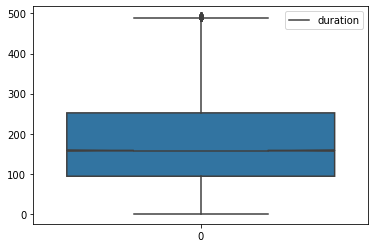

In [115]:
sns.boxplot(data=[bank_2['duration']],notch=True)
plt.legend(['duration'])

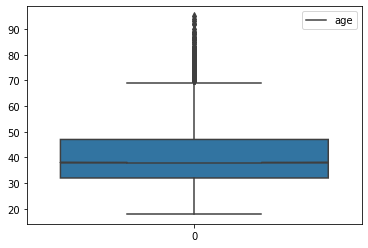

In [116]:
sns.boxplot(data=[bank_2['age']],notch=True)
plt.legend(['age'])


In [117]:
Q1 = bank_2.age.quantile(0.25)
Q3 = bank_2.age.quantile(0.75)
Q1, Q3

(32.0, 47.0)

In [118]:
IQR=Q3-Q1
print(IQR)

15.0


In [119]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(9.5, 69.5)

In [120]:
bank_2[(bank_2.age<lower_limit)|(bank_2.age>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
31052,71,retired,married,unknown,no,362,no,no,telephone,12,feb,139,2,-1,0,unknown,no
31057,72,retired,married,tertiary,no,0,no,no,cellular,13,feb,99,1,-1,0,unknown,yes
31069,90,retired,divorced,secondary,no,1,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
31089,82,retired,married,tertiary,no,278,no,no,cellular,16,feb,223,7,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45101,74,retired,married,secondary,no,935,no,no,cellular,25,oct,400,1,173,3,success,yes
45104,73,retired,married,primary,no,1388,no,no,telephone,25,oct,254,1,97,6,failure,no
45134,70,retired,married,secondary,no,0,no,no,cellular,27,oct,258,1,92,5,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [121]:
bank_2 = bank_2[(bank_2.age>lower_limit)&(bank_2.age<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


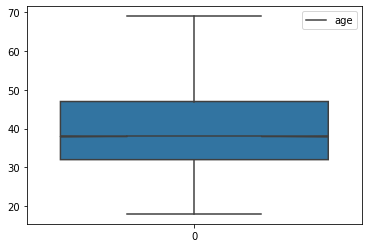

In [122]:
sns.boxplot(data=[bank_2['age']],notch=True)
plt.legend(['age'])

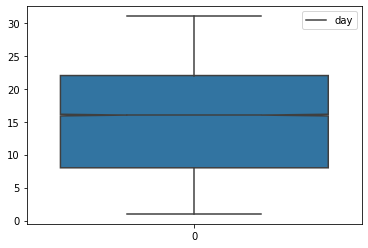

In [123]:
sns.boxplot(data=[bank_2['day']],notch=True)
plt.legend(['day'])

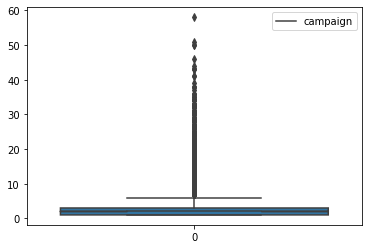

In [124]:
sns.boxplot(data=[bank_2['campaign']],notch=True)
plt.legend(['campaign'])

In [125]:
Q1 = bank_2.campaign.quantile(0.25)
Q3 = bank_2.campaign.quantile(0.75)
Q1, Q3

(1.0, 3.0)

In [126]:
IQR=Q3-Q1
print(IQR)

2.0


In [127]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-2.0, 6.0)

In [128]:
bank_2[(bank_2.campaign<lower_limit)|(bank_2.campaign>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,no
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,no
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,-1,0,unknown,no
1103,52,technician,married,unknown,no,133,yes,no,unknown,7,may,253,8,-1,0,unknown,no
1386,37,admin.,married,primary,no,242,yes,no,unknown,8,may,161,8,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44378,24,student,single,secondary,no,867,no,no,cellular,2,aug,135,7,108,8,other,no
44583,24,student,single,secondary,no,431,no,no,cellular,19,aug,418,11,185,5,success,yes
44666,25,technician,single,secondary,no,1298,no,no,cellular,2,sep,206,7,94,2,other,no
44770,37,services,single,tertiary,no,1189,no,no,cellular,13,sep,323,9,199,4,other,yes


In [129]:
bank_2 = bank_2[(bank_2.campaign>lower_limit)&(bank_2.campaign<upper_limit)]
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


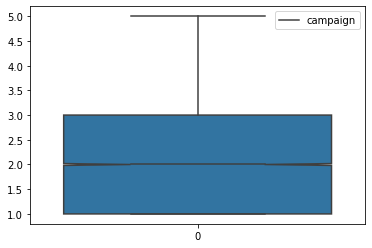

In [130]:
sns.boxplot(data=[bank_2['campaign']],notch=True)
plt.legend(['campaign'])

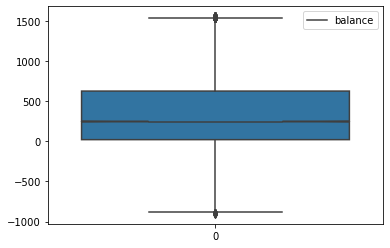

In [131]:
sns.boxplot(data=[bank_2['balance']],notch=True)
plt.legend(['balance'])

# Transforming Categorical Into Numerical Data

In [132]:
dummys=pd.get_dummies(bank_2.default)
dummys

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [133]:
merged = pd.concat([bank_2,dummys],axis='columns')

In [134]:
merged

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,no,yes
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1,0
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1,0
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1,0
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1,0


In [135]:
bank_2 = merged.drop(['default','yes'],axis = 'columns')
bank_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1


In [136]:
bank_2.rename(columns={'no':'default'},inplace = True)

In [137]:
bank_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1


In [138]:
dummy = pd.get_dummies(bank_2.y)
dummys

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [139]:
merged = pd.concat([bank_2,dummys],axis='columns')
merged

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default,no,yes
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1,1,0


In [140]:
bank_2 = merged.drop(['y','no'],axis = 'columns')
bank_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,default,yes
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,0


In [141]:
bank_2.rename(columns={'yes':'y'},inplace=True)
bank_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,0


In [142]:
dummys = pd.get_dummies(bank_2.loan)
dummys

,no,yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [143]:
merged = pd.concat([bank_2,dummys],axis='columns')
merged

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,no,yes
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,1,0,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0


In [144]:
bank_2 = merged.drop(['loan','yes'],axis='columns')
bank_2

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1
45201,53,management,married,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1
45202,34,admin.,single,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1
45203,23,student,single,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1


In [145]:
bank_2.rename(columns={'no':'loan'},inplace=True)
bank_2

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1
45201,53,management,married,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1
45202,34,admin.,single,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1
45203,23,student,single,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1


In [146]:
dummys=pd.get_dummies(bank_2.marital)
dummys

,divorced,married,single
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
...,...,...,...
45198,0,1,0
45201,0,1,0
45202,0,0,1
45203,0,0,1


In [147]:
merged = pd.concat([bank_2,dummys],axis='columns')
merged

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,divorced,married,single
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,0,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,0,1,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1,0,1,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,0,1
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,0,1,0
45201,53,management,married,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1,0,1,0
45202,34,admin.,single,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,0,1
45203,23,student,single,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,0,1


In [148]:
bank_2 = merged.drop(['marital','divorced'],axis='columns')
bank_2

,age,job,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single
1,44,technician,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,1
2,33,entrepreneur,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,1,0
3,47,blue-collar,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1,1,0
4,33,unknown,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,1
5,35,management,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,1,0
45201,53,management,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1,1,0
45202,34,admin.,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,1
45203,23,student,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,1


In [149]:
dummys = pd.get_dummies(bank_2.housing)
dummys

,no,yes
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [150]:
merged = pd.concat([bank_2,dummys],axis='columns')
merged

,age,job,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,no,yes
1,44,technician,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,1,0,1
2,33,entrepreneur,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,1,0,0,1
3,47,blue-collar,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1,1,0,0,1
4,33,unknown,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,1,1,0
5,35,management,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,1,0,1,0
45201,53,management,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1,1,0,1,0
45202,34,admin.,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,1,1,0
45203,23,student,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,1,1,0


In [151]:
bank_2 = merged.drop(['housing','no'],axis='columns')

In [152]:
bank_2.rename(columns={'yes':'housing'},inplace=True)

In [153]:
bank_2

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,technician,secondary,29,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,1,1
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,-1,0,unknown,1,0,0,1,0,1
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,-1,0,unknown,1,0,1,1,0,1
4,33,unknown,unknown,1,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,1,0
5,35,management,tertiary,231,unknown,5,may,139,1,-1,0,unknown,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,tertiary,1428,cellular,16,nov,333,2,-1,0,unknown,1,0,1,1,0,0
45201,53,management,tertiary,583,cellular,17,nov,226,1,184,4,success,1,0,1,1,0,0
45202,34,admin.,secondary,557,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,1,0
45203,23,student,tertiary,113,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,1,0


In [154]:
from sklearn import preprocessing

In [155]:
label_encoder = preprocessing.LabelEncoder()

In [156]:
bank_2['month']=label_encoder.fit_transform(bank_2['month'])

In [157]:
bank_2['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [158]:
bank_2['job']=label_encoder.fit_transform(bank_2['job'])

In [159]:
bank_2['job'].unique()

array([ 9,  2,  1, 11,  4,  5,  0,  7,  6, 10,  3,  8])

In [160]:
bank_2

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,9,secondary,29,unknown,5,8,151,1,-1,0,unknown,1,0,1,0,1,1
2,33,2,secondary,2,unknown,5,8,76,1,-1,0,unknown,1,0,0,1,0,1
3,47,1,unknown,1506,unknown,5,8,92,1,-1,0,unknown,1,0,1,1,0,1
4,33,11,unknown,1,unknown,5,8,198,1,-1,0,unknown,1,0,1,0,1,0
5,35,4,tertiary,231,unknown,5,8,139,1,-1,0,unknown,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,tertiary,1428,cellular,16,9,333,2,-1,0,unknown,1,0,1,1,0,0
45201,53,4,tertiary,583,cellular,17,9,226,1,184,4,success,1,0,1,1,0,0
45202,34,0,secondary,557,cellular,17,9,224,1,-1,0,unknown,1,0,1,0,1,0
45203,23,8,tertiary,113,cellular,17,9,266,1,-1,0,unknown,1,0,1,0,1,0


In [161]:
bank_2['contact']=label_encoder.fit_transform(bank_2['contact'])

In [162]:
bank_2['contact'].unique()

array([2, 0, 1])

In [163]:
bank_2

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,9,secondary,29,2,5,8,151,1,-1,0,unknown,1,0,1,0,1,1
2,33,2,secondary,2,2,5,8,76,1,-1,0,unknown,1,0,0,1,0,1
3,47,1,unknown,1506,2,5,8,92,1,-1,0,unknown,1,0,1,1,0,1
4,33,11,unknown,1,2,5,8,198,1,-1,0,unknown,1,0,1,0,1,0
5,35,4,tertiary,231,2,5,8,139,1,-1,0,unknown,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,tertiary,1428,0,16,9,333,2,-1,0,unknown,1,0,1,1,0,0
45201,53,4,tertiary,583,0,17,9,226,1,184,4,success,1,0,1,1,0,0
45202,34,0,secondary,557,0,17,9,224,1,-1,0,unknown,1,0,1,0,1,0
45203,23,8,tertiary,113,0,17,9,266,1,-1,0,unknown,1,0,1,0,1,0


In [164]:
bank_2['education']=label_encoder.fit_transform(bank_2['education'])
bank_2['poutcome']=label_encoder.fit_transform(bank_2['poutcome'])

In [165]:
print(bank_2['education'].unique())
print(bank_2['poutcome'].unique())

[1 3 2 0]
[3 0 1 2]


In [166]:
bank_2.head(20)

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,9,1,29,2,5,8,151,1,-1,0,3,1,0,1,0,1,1
2,33,2,1,2,2,5,8,76,1,-1,0,3,1,0,0,1,0,1
3,47,1,3,1506,2,5,8,92,1,-1,0,3,1,0,1,1,0,1
4,33,11,3,1,2,5,8,198,1,-1,0,3,1,0,1,0,1,0
5,35,4,2,231,2,5,8,139,1,-1,0,3,1,0,1,1,0,1
6,28,4,2,447,2,5,8,217,1,-1,0,3,1,0,0,0,1,1
7,42,2,2,2,2,5,8,380,1,-1,0,3,0,1,1,0,0,1
8,58,5,0,121,2,5,8,50,1,-1,0,3,1,0,1,1,0,1
9,43,9,1,593,2,5,8,55,1,-1,0,3,1,0,1,0,1,1
10,41,0,1,270,2,5,8,222,1,-1,0,3,1,0,1,0,0,1


In [167]:
bank_2.shape

(27125, 18)

# Checking Data Distrubution


In [168]:
bank_2.skew()

age           0.431987
job           0.265965
education     0.253668
balance       0.650142
contact       0.721346
day           0.174059
month        -0.531990
duration      0.712891
campaign      1.020245
pdays         2.567335
previous     55.293386
poutcome     -1.929440
default      -6.593461
y             6.593461
loan         -1.682134
married      -0.366037
single        0.917428
housing      -0.338709
dtype: float64

In [169]:
bank_2.kurtosis()

age            -0.671062
job            -1.329823
education      -0.134180
balance         0.060966
contact        -1.409798
day            -1.072601
month          -0.936639
duration       -0.241040
campaign        0.137318
pdays           6.654482
previous     5893.547463
poutcome        1.947522
default        41.476788
y              41.476788
loan            0.829634
married        -1.866155
single         -1.158411
housing        -1.885415
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

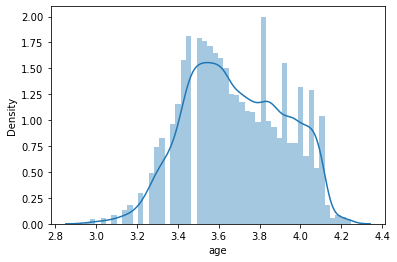

In [170]:
bank_2['age']=np.log(bank_2['age']+1)
sns.distplot(bank_2['age'])

In [171]:
bank_2.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,3.806662,9,1,29,2,5,8,151,1,-1,0,3,1,0,1,0,1,1
2,3.526361,2,1,2,2,5,8,76,1,-1,0,3,1,0,0,1,0,1
3,3.871201,1,3,1506,2,5,8,92,1,-1,0,3,1,0,1,1,0,1
4,3.526361,11,3,1,2,5,8,198,1,-1,0,3,1,0,1,0,1,0
5,3.583519,4,2,231,2,5,8,139,1,-1,0,3,1,0,1,1,0,1


# Feature Selection

In [172]:
X = bank_2.drop("y",axis=1)                   #Feature matrix
y = bank_2['y']

In [173]:
bank_2.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,3.806662,9,1,29,2,5,8,151,1,-1,0,3,1,0,1,0,1,1
2,3.526361,2,1,2,2,5,8,76,1,-1,0,3,1,0,0,1,0,1
3,3.871201,1,3,1506,2,5,8,92,1,-1,0,3,1,0,1,1,0,1
4,3.526361,11,3,1,2,5,8,198,1,-1,0,3,1,0,1,0,1,0
5,3.583519,4,2,231,2,5,8,139,1,-1,0,3,1,0,1,1,0,1


In [174]:
X.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,loan,married,single,housing
1,3.806662,9,1,29,2,5,8,151,1,-1,0,3,1,1,0,1,1
2,3.526361,2,1,2,2,5,8,76,1,-1,0,3,1,0,1,0,1
3,3.871201,1,3,1506,2,5,8,92,1,-1,0,3,1,1,1,0,1
4,3.526361,11,3,1,2,5,8,198,1,-1,0,3,1,1,0,1,0
5,3.583519,4,2,231,2,5,8,139,1,-1,0,3,1,1,1,0,1


In [175]:
y.tail()

45198    0
45201    0
45202    0
45203    0
45205    0
Name: y, dtype: uint8

In [176]:
X.corr()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,loan,married,single,housing
age,1.000000,-0.033207,-0.107398,0.039280,0.044211,-0.009080,-0.050873,-0.046647,0.040626,-0.031549,-0.013504,0.017392,0.013246,-0.016723,0.304875,-0.457912,-0.114943
job,-0.033207,1.000000,0.167760,0.008917,-0.077457,0.024151,-0.093260,-0.001157,0.011406,-0.030101,-0.000505,0.016161,0.009032,0.031053,-0.093803,0.092484,-0.129272
education,-0.107398,0.167760,1.000000,0.054472,-0.114881,0.025570,-0.057684,0.001276,-0.015470,0.001012,0.019519,-0.022513,0.013760,0.046018,-0.124214,0.141582,-0.096320
balance,0.039280,0.008917,0.054472,1.000000,-0.035139,-0.005592,-0.027078,0.021065,-0.014199,0.040831,0.034588,-0.056495,0.143041,0.086291,0.022199,0.007694,-0.021974
contact,0.044211,-0.077457,-0.114881,-0.035139,1.000000,-0.026240,0.389103,-0.024207,-0.016517,-0.252643,-0.139948,0.285355,-0.022925,0.007631,0.036821,-0.051972,0.186993
day,-0.009080,0.024151,0.025570,-0.005592,-0.026240,1.000000,-0.014048,-0.037927,0.096925,-0.080723,-0.041653,0.069540,-0.008419,-0.006046,-0.002201,0.000537,-0.036390
month,-0.050873,-0.093260,-0.057684,-0.027078,0.389103,-0.014048,1.000000,0.001535,-0.111877,0.024750,0.011858,-0.016222,-0.021294,-0.021851,-0.019194,0.003922,0.285686
duration,-0.046647,-0.001157,0.001276,0.021065,-0.024207,-0.037927,0.001535,1.000000,-0.063974,0.014520,0.015283,-0.000733,-0.002608,0.005907,-0.018920,0.023559,0.009219
campaign,0.040626,0.011406,-0.015470,-0.014199,-0.016517,0.096925,-0.111877,-0.063974,1.000000,-0.067754,-0.009267,0.082456,-0.013010,0.003716,0.048350,-0.044832,-0.031013
pdays,-0.031549,-0.030101,0.001012,0.040831,-0.252643,-0.080723,0.024750,0.014520,-0.067754,1.000000,0.416111,-0.867614,0.035748,0.028013,-0.028538,0.034092,0.138718


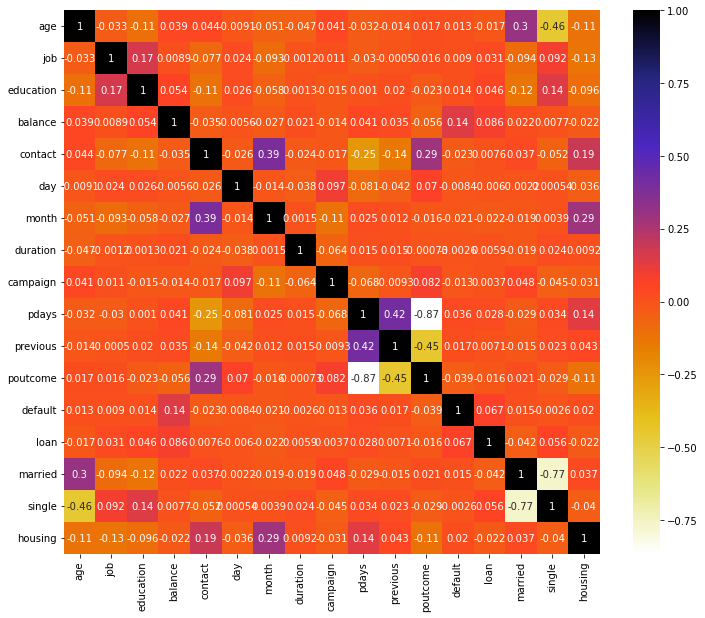

In [177]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X.corr()                                          #Using Pearson Correlation
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [178]:
sc_x=StandardScaler()
sc_x=sc_x.fit_transform(X)

In [179]:
sc_x

array([[ 0.51700253,  1.41918157, -0.27490303, ..., -1.19961628,
         1.55886844,  0.84489256],
       [-0.65903727, -0.68754436, -0.27490303, ...,  0.83359989,
        -0.64149095,  0.84489256],
       [ 0.78778147, -0.98850521,  2.45250904, ...,  0.83359989,
        -0.64149095,  0.84489256],
       ...,
       [-0.53741666, -1.28946606, -0.27490303, ..., -1.19961628,
         1.55886844, -1.18358245],
       [-2.1203989 ,  1.11822073,  1.08880301, ..., -1.19961628,
         1.55886844, -1.18358245],
       [-1.78457032,  1.41918157, -0.27490303, ..., -1.19961628,
         1.55886844, -1.18358245]])

In [180]:
lr=LogisticRegression()
lr=lr.fit(X,y)

In [181]:
y_pred=lr.predict(X)

In [182]:
y_pred_df = pd.DataFrame({'actual': y, 'predicted_prob': lr.predict(X)})

In [183]:
y_pred_df

,actual,predicted_prob
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
45198,0,0
45201,0,0
45202,0,0
45203,0,0


In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[26535     6]
 [   50   534]]


Text(0, 0.5, 'True Positive Rate')

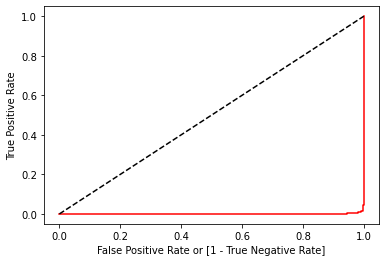

In [185]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,0])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [186]:
auc

0.9570787481554772

In [187]:
((26535+534)/(26535+534+6+50))*100

99.79354838709678